In [1]:
import os
import numpy as np
from PIL import Image, ImageOps

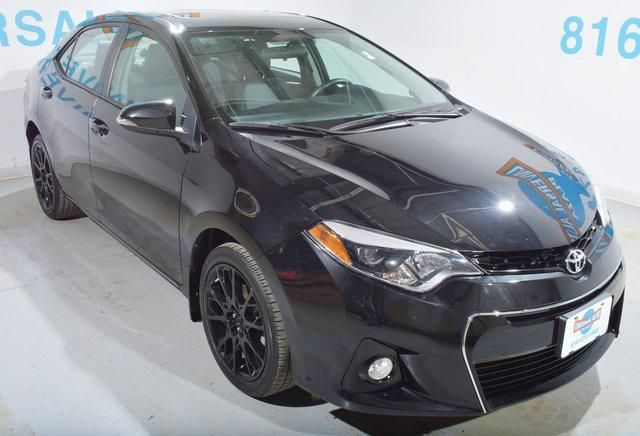

(640, 436)


In [41]:
im1 = Image.open('./test_stylegan/test_weird.jpg')
display(im1)
print(im1.size)

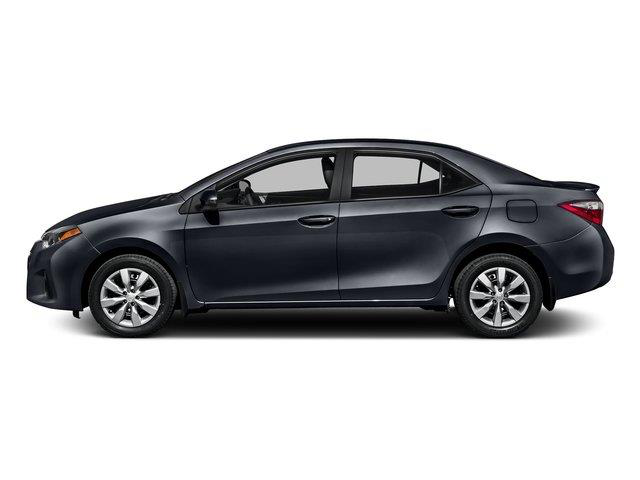

(640, 480)


In [47]:
im2 = Image.open('./test_stylegan/merge4.jpg')
display(im2)
print(im2.size)

(512, 349)


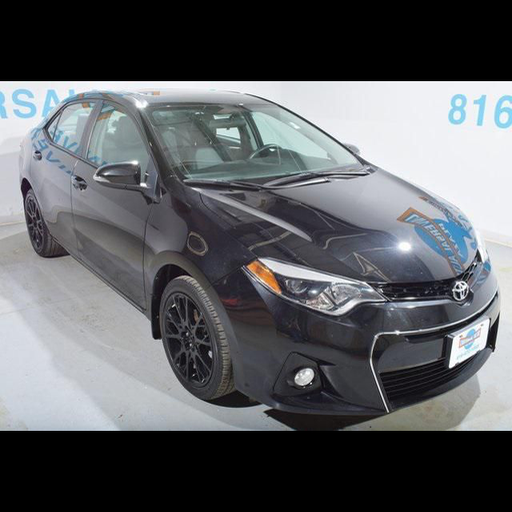

(512, 512)


In [43]:
im1.thumbnail((512,512), Image.ANTIALIAS)
print(im1.size)
if 256 < max(im1.size) < 512:
    im1.thumbnail((256,256), Image.ANTIALIAS)
    print(im1.size)
pad = (max(im1.size)-min(im1.size))//2
new_im1 = ImageOps.expand(im1, border=(0,pad,0,pad))
if new_im1.size[0] != new_im1.size[1]:
    new_im1 = new_im1.resize((max(new_im1.size),max(new_im1.size)), Image.ANTIALIAS)
display(new_im1)
print(new_im1.size)

(512, 384)


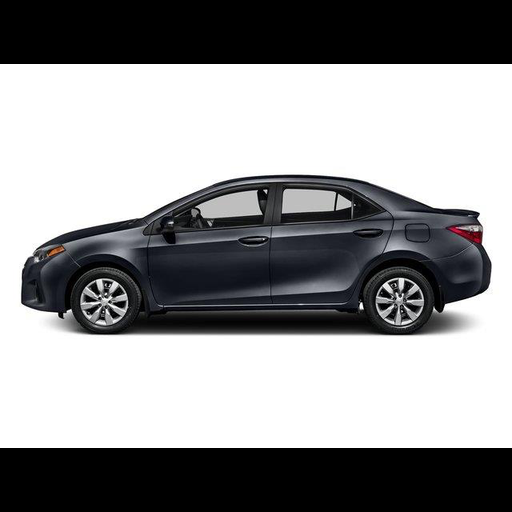

(512, 512)


In [48]:
im2.thumbnail((512,512), Image.ANTIALIAS)
print(im2.size)
if 256 < max(im2.size) < 512:
    im2.thumbnail((256,256), Image.ANTIALIAS)
    print(im2.size)
pad = (max(im2.size)-min(im2.size))//2
new_im2 = ImageOps.expand(im2, border=(0,pad,0,pad))
if new_im2.size[0] != new_im2.size[1]:
    new_im2 = new_im2.resize((max(new_im2.size),max(new_im2.size)), Image.ANTIALIAS)
display(new_im2)
print(new_im2.size)

In [49]:
#new_im1.save('./resized_images/test_weird.jpg')
new_im2.save('./resized_images/merge4.jpg')

In [2]:
os.listdir('./resized_images/')

['test_weird2.jpg',
 'merge4.jpg',
 'toyota10.jpg',
 'merge3.jpg',
 'toyota9.jpg',
 'merge2.jpg',
 'merge1.jpg',
 'test_weird.jpg']

In [3]:
!python project_images.py --initial-learning-rate=0.0085 --num-steps=3000 resized_images/ generated_images/

/home/rahul/miniconda2/envs/mason3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/rahul/miniconda2/envs/mason3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/rahul/miniconda2/envs/mason3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/rahul/miniconda2/envs/mason3/lib/python3

In [9]:
!export PATH=/usr/local/cuda-10.0/bin${PATH:+:${PATH}}$ 
!export LD_LIBRARY_PATH=/usr/local/cuda-10.0/lib64${LD_LIBRARY_PATH:+:${LD_LIBRARY_PATH}}

In [11]:
!nvcc --version

/bin/sh: 1: nvcc: not found


In [ ]:
!unzip test_stylegan.zip

Archive:  test_stylegan.zip
   creating: test_stylegan/
  inflating: test_stylegan/.DS_Store  
replace __MACOSX/test_stylegan/._.DS_Store? [y]es, [n]o, [A]ll, [N]one, [r]ename: 

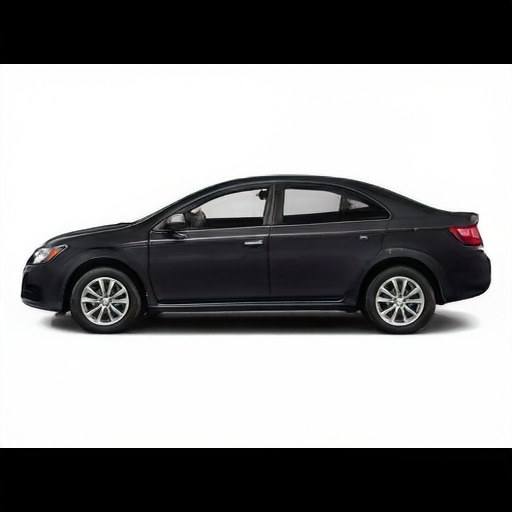

In [16]:

import numpy as np
#import config
import dnnlib
import dnnlib.tflib as tflib
import pickle
import PIL.Image
# load the StyleGAN model into Colab
URL_FFHQ = 'http://d36zk2xti64re0.cloudfront.net/stylegan2/networks/stylegan2-car-config-f.pkl'
tflib.init_tf()
with dnnlib.util.open_url(URL_FFHQ, cache_dir='./cache/') as f:
    generator_network, discriminator_network, Gs_network = pickle.load(f)
# load the latents
s1 = np.load('./generated_images/merge1.npy')
s2 = np.load('./generated_images/merge2.npy')
s3 = np.load('./generated_images/merge3.npy')
s4 = np.load('./generated_images/merge4.npy')
s1 = np.expand_dims(s1,axis=0)
s2 = np.expand_dims(s2,axis=0)
s3 = np.expand_dims(s3, axis=0)
s4 = np.expand_dims(s4, axis=0)
# combine the latents somehow... let's try an average:
#savg = 0.25*(s1+s2+s3+s4)
savg = 0.1*s1+0.1*s2+0.1*s3+0.7*s4
# run the generator network to render the latents:
synthesis_kwargs = dict(output_transform=dict(func=tflib.convert_images_to_uint8, nchw_to_nhwc=False), minibatch_size=8)
images = Gs_network.components.synthesis.run(savg, randomize_noise=True, **synthesis_kwargs)
display(PIL.Image.fromarray(images.transpose((0,2,3,1))[0], 'RGB').resize((512,512),PIL.Image.LANCZOS))